Data understanding and cleaning

In [50]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


#reading data

df=pd.read_csv("heart.csv")
df.head()



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [51]:
# shape of data

df.shape

(319795, 18)

In [52]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [53]:
# checking null values
df.isnull().sum()

# # dropping null values
# df=df.dropna()
# df.shape


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [54]:
#checking for ouliers
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [55]:
# removing outliers 
index = df[(df['SleepTime'] <= df['SleepTime'].quantile(0.05))|(df['SleepTime'] >= df['SleepTime'].quantile(0.95))].index
df.drop(index, inplace=True)

index1 = df[df['BMI'] >= df['BMI'].quantile(0.95)].index
df.drop(index1, inplace=True)


df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,248962.000000,248962.000000,248962.000000,248962.000000
mean,27.297357,2.614118,3.216929,7.125087
std,4.797426,6.925709,7.087267,0.780192
min,12.020000,0.000000,0.000000,6.000000
25%,23.750000,0.000000,0.000000,7.000000
50%,26.690000,0.000000,0.000000,7.000000
75%,30.410000,1.000000,2.000000,8.000000
max,39.560000,30.000000,30.000000,8.000000


In [56]:
# checking unique values

for i in df.columns:
    print(f'Unique Values of {i.title()}: {df[i].unique()}')


Unique Values of Heartdisease: ['No' 'Yes']
Unique Values of Bmi: [20.34 26.58 24.21 ... 27.42 15.57 16.18]
Unique Values of Smoking: ['No' 'Yes']
Unique Values of Alcoholdrinking: ['No' 'Yes']
Unique Values of Stroke: ['Yes' 'No']
Unique Values of Physicalhealth: [ 0. 20. 28.  7.  1.  2. 30.  5.  4.  6. 15.  3. 14. 18.  8. 10. 16. 25.
 21. 12. 29. 19. 22.  9. 13. 17. 26. 23. 27. 24. 11.]
Unique Values of Mentalhealth: [ 0. 30.  5. 15.  4. 10.  2.  3. 14.  8. 20.  1.  7. 28. 16. 12. 24.  6.
 25.  9. 18. 21. 29. 17. 23. 22. 13. 27. 26. 11. 19.]
Unique Values of Diffwalking: ['No' 'Yes']
Unique Values of Sex: ['Female' 'Male']
Unique Values of Agecategory: ['80 or older' '65-69' '75-79' '40-44' '50-54' '70-74' '45-49' '60-64'
 '55-59' '18-24' '35-39' '25-29' '30-34']
Unique Values of Race: ['White' 'Black' 'American Indian/Alaskan Native' 'Asian' 'Hispanic'
 'Other']
Unique Values of Diabetic: ['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique Values of Physicalactivi

In [57]:


le = LabelEncoder()

#changing object to float type

x=df
x=x.replace(to_replace ="No, borderline diabetes", value ="Yes")
x=x.replace(to_replace ="Yes (during pregnancy)", value ="No")

categorical_var=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease']
for i in categorical_var:
   x[i]=x[i].apply(lambda x: 0 if x=='No'else 1).astype('int')

x['Sex']=x['Sex'].apply(lambda x: 0 if x=='Female'else 1).astype('int')

# encoder 


x['Race'] = le.fit_transform(x['Race'])
x['GenHealth'] = le.fit_transform(x['GenHealth'])

x['AgeCategory']= le.fit_transform(x['AgeCategory'])

x=x.astype(float)
x.head(10)
# for i in x.columns:
#   print(f'Unique Values of {i.title()}: {x[i].unique()}')


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,1.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0
12,0.0,28.37,1.0,0.0,0.0,0.0,0.0,1.0,1.0,11.0,5.0,1.0,1.0,4.0,8.0,0.0,0.0,0.0
13,0.0,28.15,0.0,0.0,0.0,7.0,0.0,1.0,0.0,12.0,5.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0
15,0.0,29.18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,5.0,0.0,1.0,4.0,6.0,0.0,0.0,0.0
17,0.0,22.59,1.0,0.0,0.0,0.0,30.0,1.0,1.0,10.0,5.0,1.0,1.0,2.0,8.0,0.0,0.0,0.0
19,0.0,18.13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,5.0,0.0,1.0,0.0,8.0,0.0,0.0,1.0
20,0.0,21.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,1.0,0.0,2.0,8.0,0.0,0.0,0.0


In [58]:
# scaling the data usinf min max scaler
y=x
cols = y.columns
ms = StandardScaler()

y = ms.fit_transform(y)
y = pd.DataFrame(y, columns=[cols])


y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248962 entries, 0 to 248961
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   (HeartDisease,)      248962 non-null  float64
 1   (BMI,)               248962 non-null  float64
 2   (Smoking,)           248962 non-null  float64
 3   (AlcoholDrinking,)   248962 non-null  float64
 4   (Stroke,)            248962 non-null  float64
 5   (PhysicalHealth,)    248962 non-null  float64
 6   (MentalHealth,)      248962 non-null  float64
 7   (DiffWalking,)       248962 non-null  float64
 8   (Sex,)               248962 non-null  float64
 9   (AgeCategory,)       248962 non-null  float64
 10  (Race,)              248962 non-null  float64
 11  (Diabetic,)          248962 non-null  float64
 12  (PhysicalActivity,)  248962 non-null  float64
 13  (GenHealth,)         248962 non-null  float64
 14  (SleepTime,)         248962 non-null  float64
 15  (Asthma,)        

In [59]:
# applying kmeans on full dataset

cost_full={}

cost=[]
time_=[]

for i in range(25):
  t0= time.time()
  kmeans = KMeans(n_clusters=100, init='k-means++', max_iter=5,n_init=1).fit(y)
  t1=time.time()-t0
  cost.append(kmeans.inertia_)
  time_.append(t1)

cost_full[100]= [sum(cost)/len(cost), sum(time_)/len(time_)]

# for k=500
cost=[]
time_=[]
for i in range(25):
   t0= time.time()
   kmeans = KMeans(n_clusters=200, init='k-means++', max_iter=5,n_init=1).fit(y)
   t1=time.time()-t0
   cost.append(kmeans.inertia_)
   time_.append(t1)

cost_full[200]= [sum(cost)/len(cost), sum(time_)/len(time_)]


print(cost_full)

 

{100: [1399255.1696792045, 5.56425106048584], 200: [1115154.0034077878, 11.615397205352783]}


In [60]:
#applying adaptive sampling

def myfunc(e):
    return e[1]
def adaptive(data,m):
      
    data1=data
    b=[]

    # while loop
    while data1.shape[0]>2:
        samples=np.random.choice(data1.shape[0],2,replace=False)
        s=data1.iloc[samples]
        dist=[]
        # removing half points
        for i in range(len(data1)):
            dist.append(min(np.linalg.norm(s-data1.iloc[i],axis=1)))
        for ind,val in enumerate(dist):
            dist[ind]=(ind,val)
        dist.sort(key=myfunc)
        data2=[]
        for i in range(int(len(dist)/2), len(dist)):
            data2.append(data1.iloc[dist[i][0]])
        data1=pd.DataFrame(data2)
        b.extend(np.array(s))

    min_dist=[]
    b=pd.DataFrame(data=b, columns=data.columns)
    for i in range(len(data)):
        min_dist.append(min(np.linalg.norm(b-data.iloc[i],axis=1)**2))
    suma=sum(min_dist)
    pr=[]
    for i in range(len(data)):
        pr.append(min_dist[i]/suma)
    sample=np.random.choice(data.shape[0],m,replace=False,p=pr)
    c=data.iloc[sample]
    weights=[]
    for sam in sample:
        weights.append(1/(pr[sam]*m))
     
    return c, weights


new=np.random.choice(y.shape[0],10000,replace=False)
y_new=y.iloc[new]
centers=[100,200]
subset_le=[1000,2000,3000,4000,5000]
cost_adaptive={}

for center in centers:
    for lenth in subset_le:
        t0= time.time()
        y_coreset, y_weights=adaptive(y_new,lenth)
        y_weights = [int(y.shape[0])*x for x in y_weights]
        y_weights = [x/int(y_new.shape[0]) for x in y_weights]


        kmeans = KMeans(n_clusters=center, init='k-means++', max_iter=5,n_init=1).fit(y_coreset, sample_weight=y_weights)
        t1=time.time()-t0
    
        cost_adaptive[(center,lenth)]= [kmeans.inertia_, t1]

print(cost_adaptive)

{(100, 1000): [1229153.9948947346, 21.113779306411743], (100, 2000): [1328896.6888495577, 23.995542526245117], (100, 3000): [1359479.8254649842, 22.729846477508545], (100, 4000): [1342028.574184538, 21.72310209274292], (100, 5000): [1364426.4222883002, 22.73963952064514], (200, 1000): [798099.9038026842, 13.909090995788574], (200, 2000): [924007.4886993199, 9.049507141113281], (200, 3000): [991331.9455066852, 9.00482177734375], (200, 4000): [1016128.3783834634, 9.353960037231445], (200, 5000): [1021822.9480855179, 9.40883994102478]}


In [61]:
# applying k-means on lightweight coreset


def lightweight(data, m):


    """Reduces (NxD) data matrix from N to Np data points.
    Args:
        data: ndarray of shape [N, D]
        Np: number of data points in the coreset
    Returns:
        coreset: ndarray of shape [Np, D]
        weights: 1darray of shape [Np, 1]
    """
    N = data.shape[0]
    # compute mean
    u = np.mean(data, axis=0)

    # compute proposal distribution
    q = np.linalg.norm(data - u, axis=1)**2
    sum = np.sum(q)
    q = 0.5 * (q/sum + 1.0/N)


    # get sample and fill coreset
    samples = np.random.choice(N, m, replace=False ,p=q)
    coreset = data.iloc[samples]
    weights = 1.0 / (q[samples] * m)
    
    return coreset, weights



centers=[100,200]
subset_le=[1000,2000,3000,4000,5000]
cost_lightweight={}

for center in centers:
    for lenth in subset_le:
        cost=[]
        time_=[]
        
        for i in range(25):
            t0= time.time()
            y_coreset, y_weights=lightweight(y,lenth)
            kmeans = KMeans(n_clusters=center, init='k-means++', max_iter=5,n_init=1).fit(y_coreset, sample_weight=y_weights)
            t1=time.time()-t0
            cost.append(kmeans.inertia_)
            time_.append(t1)
        
        cost_lightweight[(center,lenth)]= [sum(cost)/len(cost), sum(time_)/len(time_)]

print(cost_lightweight)

{(100, 1000): [1232399.3385168707, 0.13566543579101562], (100, 2000): [1335779.4783740917, 0.14195070266723633], (100, 3000): [1354754.3406499645, 0.16470128059387207], (100, 4000): [1384350.721431132, 0.17894250869750977], (100, 5000): [1390692.9718834215, 0.18894688606262208], (200, 1000): [838796.7739568858, 0.16288581848144532], (200, 2000): [979279.8491153144, 0.19698602676391602], (200, 3000): [1028126.9747971016, 0.23543495178222656], (200, 4000): [1053715.067385841, 0.2596291065216064], (200, 5000): [1067816.2192904262, 0.2960681438446045]}


In [62]:
# applying kmeans on uniform coreset

def uniform(data,m):
    N = data.shape[0]
    # compute mean

    # get sample and fill coreset
    samples = np.random.choice(N,m, replace=False)
    coreset = data.iloc[samples]
    weights = np.full(m,N/m)
    
    return coreset, weights




centers=[100,200]
subset_le=[1000,2000,3000,4000,5000]
cost_uniform={}

for center in centers:
    for lenth in subset_le:
        cost=[]
        time_=[]
        for i in range(25):
            t0= time.time()
            y_coreset, y_weights=uniform(y,lenth)
            kmeans = KMeans(n_clusters=center, init='k-means++', max_iter=5, n_init=1).fit(y_coreset, sample_weight=y_weights)
            t1=time.time()-t0  
            cost.append(kmeans.inertia_)
            time_.append(t1)
        cost_uniform[(center,lenth)]= [sum(cost)/len(cost), sum(time_)/len(time_)]


print(cost_uniform)

{(100, 1000): [1113618.3228236083, 0.0747556209564209], (100, 2000): [1265877.5650702834, 0.09119685173034668], (100, 3000): [1298085.3068037862, 0.11112741470336913], (100, 4000): [1338388.2838009824, 0.12782333374023438], (100, 5000): [1342892.909922748, 0.14839898109436034], (200, 1000): [667901.8145338738, 0.11955650329589844], (200, 2000): [882241.1370000829, 0.1518920135498047], (200, 3000): [962529.8613895238, 0.18986844062805175], (200, 4000): [994319.174872341, 0.22454265594482423], (200, 5000): [1018574.3536782777, 0.23820220947265625]}


In [76]:
x_axis=[1000,2000,3000,4000,5000]
y_axis_100_light=[]
y_axis_200_light=[]
y_axis_100_uni=[]
y_axis_200_uni=[]
y_axis_100_ada=[]
y_axis_200_ada=[]


for key,value in cost_lightweight.items():
    if key[0]==100:
        y_axis_100_light.append(value[0])
    else:
        y_axis_200_light.append(value[0])

for key,value in cost_uniform.items():
    if key[0]==100:
        y_axis_100_uni.append(value[0])
    else:
        y_axis_200_uni.append(value[0])

for key,value in cost_adaptive.items():
    if key[0]==100:
        y_axis_100_ada.append(value[0])
    else:
        y_axis_200_ada.append(value[0])

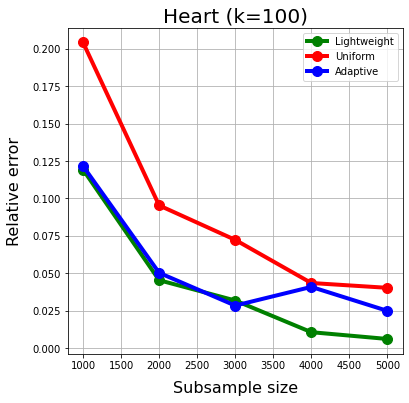

In [77]:
# plotting of relative error for k=100


# finding relative error
for i in range(len(x_axis)):
    y_axis_100_light[i]=abs(y_axis_100_light[i]-cost_full[100][0])/cost_full[100][0]
    y_axis_100_uni[i]=abs(y_axis_100_uni[i]-cost_full[100][0])/cost_full[100][0]
    y_axis_100_ada[i]=abs(y_axis_100_ada[i]-cost_full[100][0])/cost_full[100][0]
print(y_axis_100_light)
print(y_axis_100_uni)
print(y_axis_100_ada)
plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_100_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Lightweight')
plt.plot(x_axis, y_axis_100_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.plot(x_axis, y_axis_100_ada, color='blue' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Adaptive')
plt.grid(True)
# here we add the axes labels
plt.ylabel('Relative error', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('Heart (k=100)', size=20)

plt.legend(loc='upper right',prop={'size':10})


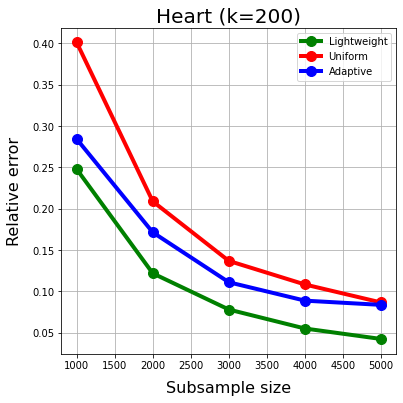

In [78]:
# plotting of relative error for k=250


# finding relative error
for i in range(len(x_axis)):
    y_axis_200_light[i]=abs(y_axis_200_light[i]-cost_full[200][0])/cost_full[200][0]
    y_axis_200_uni[i]=abs(y_axis_200_uni[i]-cost_full[200][0])/cost_full[200][0]
    y_axis_200_ada[i]=abs(y_axis_200_ada[i]-cost_full[200][0])/cost_full[200][0]


print(y_axis_200_light)
print(y_axis_200_uni)
print(y_axis_200_ada)
plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_200_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Lightweight')
plt.plot(x_axis, y_axis_200_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.plot(x_axis, y_axis_200_ada, color='blue' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Adaptive')
plt.grid(True)
# here we add the axes labels
plt.ylabel('Relative error', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('Heart (k=200)', size=20)

plt.legend(loc='upper right',prop={'size':10})
